<a href="https://colab.research.google.com/github/ahcamachod/2160-aprendiendo-a-clasificar-datos-con-ml/blob/proyecto-final/Clasificacion_primeros_pasos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Proyecto Telecom X: Parte 2**

En este proyecto, analizaremos datos de la empresa de telecomunicaciones "Telecom X" para anticipar la cancelación de sus clientes (churn).

## **1.1 Objetivo**

Utilizar la información suministrada por Telecom X para predecir los clientes con mayor probabilidad de cancelar sus servicios para implementar estrategias de retención .

## **1.2 Propuesta**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.


Se realizará predicción mediante **machine learning**, y este notebook contendrá los pasos para obtener un modelo capaz de hacer dichas predicciones, desde la **lectura**, **análisis exploratorio**, **separación** y **transformación** de los datos, hasta el **ajuste**, **evaluación** y **comparación** de modelos de clasificación.

## **1.3 Resumen**


---
Empresa: Telecom X
- Problema: Alta tasa de cancelación de clientes (churn)
- Objetivo del proyecto: Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

- La empresa quiere anticiparse al problema de la cancelación, respondiendo preguntas como:

1. ¿Quienes son los clientes con mayor riesgo de evasión?
2. ¿Qué variables influyen más en este comportamiento?
3. ¿Qué perfil de cliente debemos cuidar con mayor atención?

Este conocimiento es necesario para ayudar a implemenar acciones de retención y estrategias personalizadas

---

# **2. Carga de Datos**

## **2.1 Librerias**

In [598]:
#Importando la biblioteca Pandas
import pandas as pd
from pandas import json_normalize

#Importando el módulo JSON
import json


# Import requests to fetch data from URL
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

#Librerias para el preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Ayuda a hacer la transformacion de 1 y 0.
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer # Ayuda a generar un transformador de columnas, de forma especifica
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif # este paquete nos permie ver si hay multicolineaaridad - # importar el VIF de statsmodel
from statsmodels.tools.tools import add_constant
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression # Added LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report # Added metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols # import ols , minimos cuadrados ordninarios
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier # Added RandomForestClassifier

# Import SMOTE for handling imbalanced data
from imblearn.over_sampling import SMOTE

## **2.2 Dataset Telecom X Parte 1**

In [ ]:
# Ruta url
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json' #Establece una variable url con la URL raw de GitHub donde se aloja el archivo JSON.
response = requests.get(url)          #Obtiene los Datos: Utiliza requests.get(url) para hacer una solicitud HTTP a la URL y obtener la respuesta.
data = response.json()                #Carga los Datos JSON: Analiza el contenido JSON de la respuesta en un diccionario de Python usando response.json().

df_telecomx = pd.DataFrame(data)      #Crea el DataFrame: Convierte el diccionario de Python en un DataFrame de pandas llamado df_telecomx.
df_telecomx_normalized = json_normalize(data)

display(df_telecomx_normalized.head())             #Muestra las Primeras Filas: Finalmente, imprime las primeras filas del DataFrame

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_telecomx_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Validar valores únicos por columna
for col in df_telecomx_normalized.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {df_telecomx_normalized[col].nunique()}")
  if df_telecomx_normalized[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(df_telecomx_normalized[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'customerID': 7267
------------------------------------------------------------
Valores únicos columna 'Churn': 3
Churn: ['No' 'Yes' '']
------------------------------------------------------------
Valores únicos columna 'customer.gender': 2
customer.gender: ['Female' 'Male']
------------------------------------------------------------
Valores únicos columna 'customer.SeniorCitizen': 2
customer.SeniorCitizen: [0 1]
------------------------------------------------------------
Valores únicos columna 'customer.Partner': 2
customer.Partner: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.Dependents': 2
customer.Dependents: ['Yes' 'No']
------------------------------------------------------------
Valores únicos columna 'customer.tenure': 73
------------------------------------------------------------
Valores únicos columna 'phone.PhoneService': 2
phone.PhoneService: ['Yes' 'No']
-------------------------------

In [ ]:
df_telecomx_normalized.describe() # Estadísticas descriptivas para las variables numéricas

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [ ]:
df_telecomx_normalized.describe(include='O') # Estadísticas descriptivas para las variables del tipo “object”

,customerID,Churn,customer.gender,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


En el proyecto Telecom X Parte 1, fueron tratados estos datos:

* Normalizandolos, validando valores únicos, duplicados, nulos, en blanco o vacios.
* Los campos object con valores 'Yes' se asigno 1, 'No' se asigno 0, y si hay un valor diferente se asigno -1.
* Se renombraron las columnas para facilidad.
* Se agrego la columna cuentas_diarias = Facturacion Mensual / 30

Para mayor detalle se puede observar en el repositorio del proyecto, localizado en GitHub:

[Telecom X Parte 1](https://github.com/BibiTC/DS-challenge-telecom-x.git)

**Diccionario de datos - Telecom X Parte 1**

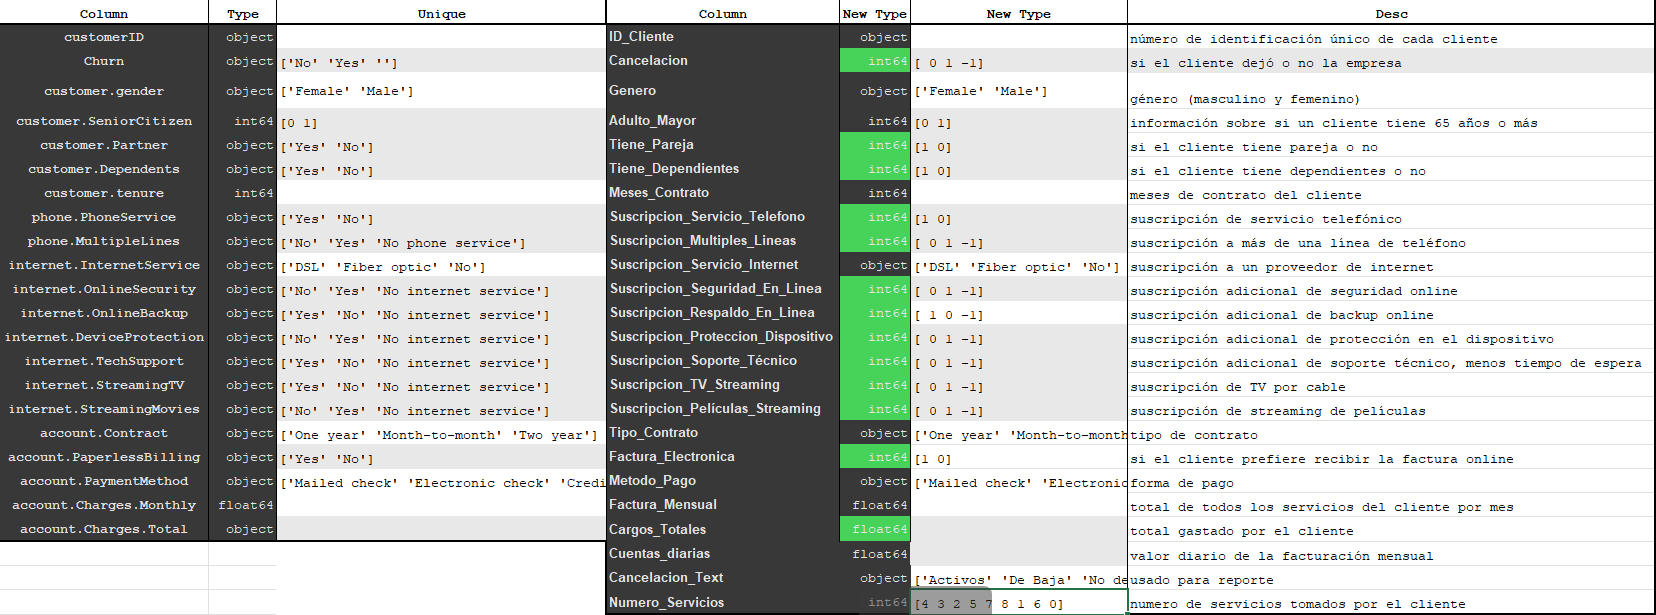

## **2.3 Dataset Telecom X Parte 2**

Archivo tratado en el proyecto Telexom X Parte 1, localizado en el respositorio de este proyecto en GitHub:

[datos_tratados_TelecomX_Parte1.csv](https://github.com/BibiTC/DS-challenge-telecom-X-Parte2.git)

# **3. Análisis exploratorio**

##3.1 Lectura de los datos

In [ ]:
datos = pd.read_csv('/content/datos_tratados_TelecomX_Parte1.csv')

#archivo = '/content/datos_tratados_TelecomX_Parte1.csv' #Establece una variable archivo con la ruta del archivo CSV .
archivo = 'https://gist.githubusercontent.com/BibiTC/8a60d1fa3560fbb455097130cc535ff4/raw/7f9f9025b8fa8c4d35536e4802b8470e4f9b6841/datos_tratados_TelecomX_Parte1.csv' #Establece una variable archivo con la ruta donde se aloja el archivo CSV en Gits.

datos = pd.read_csv(archivo)
display(datos)

,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,...,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Cancelacion_Text,Numero_Servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.60,593.30,2.2,Activos,4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.0,Activos,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.5,De Baja,2
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.3,De Baja,5
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.8,De Baja,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,One year,0,Mailed check,55.15,742.90,1.8,Activos,3
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.8,De Baja,3
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.7,Activos,2
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,Two year,0,Mailed check,67.85,4627.65,2.3,Activos,5


Para crear modelos de clasificación, necesitamos utilizar datos de calidad, sin inconsistencias y sin datos faltantes. Verificaremos si existen datos nulos y el tipo de datos de cada columna en la base de datos utilizando el método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID_Cliente                          7267 non-null   object 
 1   Cancelacion                         7267 non-null   int64  
 2   Genero                              7267 non-null   object 
 3   Adulto_Mayor                        7267 non-null   int64  
 4   Tiene_Pareja                        7267 non-null   int64  
 5   Tiene_Dependientes                  7267 non-null   int64  
 6   Meses_Contrato                      7267 non-null   int64  
 7   Suscripcion_Servicio_Telefono       7267 non-null   int64  
 8   Suscripcion_Multiples_Lineas        7267 non-null   int64  
 9   Suscripcion_Servicio_Internet       7267 non-null   object 
 10  Suscripcion_Seguridad_En_Linea      7267 non-null   int64  
 11  Suscripcion_Respaldo_En_Linea       7267 no

In [ ]:
datos.describe() # Estadísticas descriptivas para las variables numéricas

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Factura_Electronica,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Numero_Servicios
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.226366,0.162653,0.484106,0.300124,32.346498,0.902711,0.324481,0.068391,0.127013,0.125224,0.071969,0.166369,0.169946,0.593230,64.720098,2277.182035,2.158745,3.358745
std,0.486627,0.369074,0.499782,0.458343,24.571773,0.296371,0.643295,0.706329,0.738968,0.738062,0.708503,0.757553,0.759119,0.491265,30.129572,2268.648587,1.002283,2.062729
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,0.000000,0.600000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.200000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.300000,3.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,3.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.000000,8.000000


In [ ]:
datos.describe(include='O') # Estadísticas descriptivas para las variables del tipo “object” - categoricas

,ID_Cliente,Genero,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago,Cancelacion_Text
count,7267,7267,7267,7267,7267,7267
unique,7267,2,3,3,4,3
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check,Activos
freq,1,3675,3198,4005,2445,5174


## 3.2 Explorando y Preparando los datos

### 3.2.1 Remover columnas irrelevantes

Excluir variables que:

No tienen valor predictivo.
Son redundantes con otras.
Pueden causar fuga de datos.

In [ ]:
# ID Identificador de Cliente
datos = datos.drop(columns=['ID_Cliente','Cancelacion_Text','Numero_Servicios','Genero'])

In [ ]:
datos.sample(5)

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Servicio_Internet,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Tipo_Contrato,Factura_Electronica,Metodo_Pago,Factura_Mensual,Cargos_Totales,Cuentas_diarias
4132,0,1,1,0,72,1,1,Fiber optic,0,1,0,0,1,1,Two year,0,Bank transfer (automatic),98.35,6929.40,3.3
3586,0,0,1,0,60,0,-1,DSL,1,1,0,1,0,0,Two year,0,Bank transfer (automatic),37.70,2288.70,1.3
2183,1,0,1,1,41,1,1,Fiber optic,0,0,1,1,1,1,One year,1,Electronic check,102.60,4213.35,3.4
3702,0,0,0,0,60,0,-1,DSL,1,0,1,0,1,1,Two year,0,Electronic check,53.60,3237.05,1.8
5076,0,0,0,0,26,1,0,DSL,0,1,1,0,0,0,One year,1,Mailed check,56.05,1553.20,1.9


### 3.2.2 Remover filas irrelevantes

In [ ]:
# Elimino registros Churn con valores vacios, porque al analizarlos en las graficas de Telecom X Parte 1, es una cantidad poco relevante respecto al total de los datos
datos_iniciales = len(datos)
datos = datos[datos['Cancelacion'] != -1] #- En Telecom X parte 1, los valores para estos campos que estaban vacios, les asigne -1, hoy no los contemplo porque no son una cantidad relevante


# Cantidad de registros depurados churn o cancelacion con valor vacio ,osea -1
print(f"Numero de registros depurados con Churn vacio: Datos inicales {datos_iniciales} - Datos finales {len(datos)} : {datos_iniciales-len(datos)}")

# Validacion
print("Valores en 'Cancelacion' despues de remover filas vacias:")
display(datos['Cancelacion'].unique())

Numero de registros depurados con Churn vacio: Datos inicales 7267 - Datos finales 7043 : 224
Valores en 'Cancelacion' despues de remover filas vacias:


array([0, 1])

## **3.2.2.1 Verificar valores nulos**

In [ ]:
datos.isnull().sum()
# En la parte 1 del challenge, yo les habia asignado 0 a estos valores nulos, por eso el resultado es que no hay Nulos

,0
Cancelacion,0
Adulto_Mayor,0
Tiene_Pareja,0
Tiene_Dependientes,0
Meses_Contrato,0
Suscripcion_Servicio_Telefono,0
Suscripcion_Multiples_Lineas,0
Suscripcion_Servicio_Internet,0
Suscripcion_Seguridad_En_Linea,0
Suscripcion_Respaldo_En_Linea,0


In [ ]:
# Verifica valores nulos en las dos columnas
print(datos[['Cuentas_diarias', 'Cargos_Totales']].isnull().sum())

Cuentas_diarias    0
Cargos_Totales     0
dtype: int64


### 3.2.3 Agrupación de No y No service

    🎯 Objetivo

    Reducir *multicolinealidad* y simplificar los datos sin perder relevancia para el modelo predictivo.

    Varias variables de suscripcion, tenían tres categorías:

    "Yes" → cliente usa el servicio
    "No" → cliente tiene internet, pero no contrató el servicio
    "No internet service" → cliente ni siquiera tiene internet, por lo tanto no puede usar el servicio

    Esto generaba multicolinealidad perfecta al transformar estas categorías en dummies, lo que:

    Creaba correlación 1.0 entre variables
    Generaba VIF infinito
    Comprometía la estabilidad y el rendimiento de los modelos
    ✅ La solución: agrupar "No internet service" como "No"

    "Yes" = usa el servicio
    "No" = no usa el servicio (por cualquier motivo)

    Esto reduce la dimensionalidad y evita multicolinealidad.

In [ ]:
# creacion df copia para depurar datos
datos_depurados = datos.copy()

In [ ]:
# 1: Agrupar "No internet service" como "No" - En Telecom X parte 1, los valores para estos campos que no correspondian a 1 ni 0, les asigne -1, este último lo remplazo ahora por 0, porque corresponden a "No internet service"
columns_suscripcion = [
'Suscripcion_Seguridad_En_Linea',
'Suscripcion_Respaldo_En_Linea',
'Suscripcion_Proteccion_Dispositivo',
'Suscripcion_Soporte_Técnico',
'Suscripcion_TV_Streaming',
'Suscripcion_Películas_Streaming'
]


# Todas las suscripciones anteriores tienen los valores ['No' 'Yes' 'No internet service']
# No se incluye el campo 'Suscripcion_Multiples_Lineas' porque tiene estos valores y no se puede unificar el ultimo con No ['No' 'Yes' 'No phone service']

for col in columns_suscripcion:
    datos_depurados[col] = datos_depurados[col].replace(-1, 0)

In [ ]:
# Verificación
for col in columns_suscripcion:
    print(f"{col}: {datos_depurados[col].unique()}")
print(f"{'Suscripcion_Multiples_Lineas'}: {datos_depurados['Suscripcion_Multiples_Lineas'].unique()}")

Suscripcion_Seguridad_En_Linea: [0 1]
Suscripcion_Respaldo_En_Linea: [1 0]
Suscripcion_Proteccion_Dispositivo: [0 1]
Suscripcion_Soporte_Técnico: [1 0]
Suscripcion_TV_Streaming: [1 0]
Suscripcion_Películas_Streaming: [0 1]
Suscripcion_Multiples_Lineas: [ 0  1 -1]


In [ ]:
datos_depurados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancelacion                         7043 non-null   int64  
 1   Adulto_Mayor                        7043 non-null   int64  
 2   Tiene_Pareja                        7043 non-null   int64  
 3   Tiene_Dependientes                  7043 non-null   int64  
 4   Meses_Contrato                      7043 non-null   int64  
 5   Suscripcion_Servicio_Telefono       7043 non-null   int64  
 6   Suscripcion_Multiples_Lineas        7043 non-null   int64  
 7   Suscripcion_Servicio_Internet       7043 non-null   object 
 8   Suscripcion_Seguridad_En_Linea      7043 non-null   int64  
 9   Suscripcion_Respaldo_En_Linea       7043 non-null   int64  
 10  Suscripcion_Proteccion_Dispositivo  7043 non-null   int64  
 11  Suscripcion_Soporte_Técnico         7043 non-nul

Comenzaremos con las variables categóricas y luego analizaremos las variables numéricas.

In [ ]:
datos_depurados.describe() # Estadísticas descriptivas para las variables numéricas

,Cancelacion,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Suscripcion_Servicio_Telefono,Suscripcion_Multiples_Lineas,Suscripcion_Seguridad_En_Linea,Suscripcion_Respaldo_En_Linea,Suscripcion_Proteccion_Dispositivo,Suscripcion_Soporte_Técnico,Suscripcion_TV_Streaming,Suscripcion_Películas_Streaming,Factura_Electronica,Factura_Mensual,Cargos_Totales,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.325004,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.160173
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.642730,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.000961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.200000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.000000


In [ ]:
datos_depurados.describe(include='O') # Estadísticas descriptivas para las variables del tipo “object” - categoricas

,Suscripcion_Servicio_Internet,Tipo_Contrato,Metodo_Pago
count,7043,7043,7043
unique,3,3,4
top,Fiber optic,Month-to-month,Electronic check
freq,3096,3875,2365


### 3.2.4 Variables categóricas

In [ ]:
px.histogram(datos_depurados, x = 'Cancelacion', text_auto = True)

In [ ]:
px.histogram(datos_depurados, x = 'Suscripcion_Servicio_Internet', text_auto = True, color = 'Cancelacion', barmode = 'group')  #	Tipo_Contrato	Metodo_Pago

In [ ]:
px.histogram(datos_depurados, x = 'Tipo_Contrato', text_auto = True, color = 'Cancelacion', barmode = 'group')  #		Metodo_Pago

In [ ]:
px.histogram(datos_depurados, x = 'Metodo_Pago', text_auto = True, color = 'Cancelacion', barmode = 'group')

### 3.2.5 Variables numéricas

In [ ]:
px.box(datos_depurados, x = 'Meses_Contrato', color = 'Cancelacion')

In [ ]:
px.box(datos_depurados, x = 'Factura_Mensual', color = 'Cancelacion')

In [ ]:
px.box(datos_depurados, x = 'Cargos_Totales', color = 'Cancelacion')

In [ ]:
px.box(datos_depurados, x = 'Cuentas_diarias', color = 'Cancelacion')

## **3.2.6 Variables Categoricas Aplicar one-hot**

In [ ]:
# Columnas Categoricas
columns_categoricas = datos_depurados.select_dtypes(include='object').columns
print(f"Columnas categoricas:  {columns_categoricas}")

# Columnas Numericas
columns_numericas = [
  'Cancelacion',
  'Adulto_Mayor',
  'Tiene_Pareja',
  'Tiene_Dependientes',
  'Suscripcion_Servicio_Telefono',
  'Suscripcion_Multiples_Lineas',
  'Suscripcion_Seguridad_En_Linea',
  'Suscripcion_Respaldo_En_Linea',
  'Suscripcion_Proteccion_Dispositivo',
  'Suscripcion_Soporte_Técnico',
  'Suscripcion_TV_Streaming',
  'Suscripcion_Películas_Streaming',
  'Factura_Electronica'
]
print(f"\n Columnas númericas:  {columns_numericas}")

Columnas categoricas:  Index(['Suscripcion_Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago'], dtype='object')

 Columnas númericas:  ['Cancelacion', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Suscripcion_Servicio_Telefono', 'Suscripcion_Multiples_Lineas', 'Suscripcion_Seguridad_En_Linea', 'Suscripcion_Respaldo_En_Linea', 'Suscripcion_Proteccion_Dispositivo', 'Suscripcion_Soporte_Técnico', 'Suscripcion_TV_Streaming', 'Suscripcion_Películas_Streaming', 'Factura_Electronica']


In [ ]:
# Numero columnas iniciales en el Data Frame
cantidad_columnas_iniciales = len(datos_depurados.columns)

# Columnas Categoricas
datos_depurados = pd.get_dummies(datos_depurados, columns=columns_categoricas, drop_first=True)

# Columnas Númericas 2 valores
datos_depurados = pd.get_dummies(datos_depurados, columns=columns_numericas, drop_first=True)

# Numero columnas despues de ejecutar la codificacion "one-hot"
cantidad_columnas_codificadas = len(datos_depurados.columns)

In [ ]:
print(f" Q_Columnas_Iniciales: {cantidad_columnas_iniciales}")
print(f" Q_Columnas_Codificadas: {cantidad_columnas_codificadas}")
len(datos_depurados.columns)

 Q_Columnas_Iniciales: 20
 Q_Columnas_Codificadas: 25


25

In [ ]:
# Estructura
datos_depurados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Meses_Contrato                             7043 non-null   int64  
 1   Factura_Mensual                            7043 non-null   float64
 2   Cargos_Totales                             7043 non-null   float64
 3   Cuentas_diarias                            7043 non-null   float64
 4   Suscripcion_Servicio_Internet_Fiber optic  7043 non-null   bool   
 5   Suscripcion_Servicio_Internet_No           7043 non-null   bool   
 6   Tipo_Contrato_One year                     7043 non-null   bool   
 7   Tipo_Contrato_Two year                     7043 non-null   bool   
 8   Metodo_Pago_Credit card (automatic)        7043 non-null   bool   
 9   Metodo_Pago_Electronic check               7043 non-null   bool   
 10  Metodo_Pago_Mailed check     

In [ ]:
# Validar valores únicos por columna
for col in datos_depurados.columns: # columns values unique:
  print(f"Valores únicos columna '{col}': {datos_depurados[col].nunique()}")
  if datos_depurados[col].nunique() < 20: # imprimir solo si son menos de 20 valores
   print(col + ': ' + str(datos_depurados[col].unique()))
  print('-' * 60) # dividir secciones

Valores únicos columna 'Meses_Contrato': 73
------------------------------------------------------------
Valores únicos columna 'Factura_Mensual': 1585
------------------------------------------------------------
Valores únicos columna 'Cargos_Totales': 6531
------------------------------------------------------------
Valores únicos columna 'Cuentas_diarias': 35
------------------------------------------------------------
Valores únicos columna 'Suscripcion_Servicio_Internet_Fiber optic': 2
Suscripcion_Servicio_Internet_Fiber optic: [False  True]
------------------------------------------------------------
Valores únicos columna 'Suscripcion_Servicio_Internet_No': 2
Suscripcion_Servicio_Internet_No: [False  True]
------------------------------------------------------------
Valores únicos columna 'Tipo_Contrato_One year': 2
Tipo_Contrato_One year: [ True False]
------------------------------------------------------------
Valores únicos columna 'Tipo_Contrato_Two year': 2
Tipo_Contrato_T

## 3.2.7 **Normalizacion campos numericos**

In [ ]:
# Normalizar/Estandarizar columnas numéricas utilizando Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
colunas_numericas = datos_depurados.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
datos_depurados[colunas_numericas] = scaler.fit_transform(datos_depurados[colunas_numericas])

# Mostrando los datos normalizados
datos_depurados.head()

,Meses_Contrato,Factura_Mensual,Cargos_Totales,Cuentas_diarias,Suscripcion_Servicio_Internet_Fiber optic,Suscripcion_Servicio_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,...,Suscripcion_Servicio_Telefono_1,Suscripcion_Multiples_Lineas_0,Suscripcion_Multiples_Lineas_1,Suscripcion_Seguridad_En_Linea_1,Suscripcion_Respaldo_En_Linea_1,Suscripcion_Proteccion_Dispositivo_1,Suscripcion_Soporte_Técnico_1,Suscripcion_TV_Streaming_1,Suscripcion_Películas_Streaming_1,Factura_Electronica_1
0,0.125000,0.471144,0.068315,0.470588,False,False,True,False,False,False,...,True,True,False,False,True,False,True,True,False,True
1,0.125000,0.414428,0.062454,0.411765,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
2,0.055556,0.553731,0.032338,0.558824,True,False,False,False,False,True,...,True,True,False,False,False,True,False,False,False,True
3,0.180556,0.793532,0.142531,0.794118,True,False,False,False,False,True,...,True,True,False,False,True,True,False,True,True,True
4,0.041667,0.653234,0.030789,0.647059,True,False,False,False,False,False,...,True,True,False,False,False,False,True,True,False,True


## **3.2.8 Correlacion entre variables**

In [ ]:
corr = datos_depurados.corr()

In [ ]:
corr['Cancelacion_1']

,Cancelacion_1
Meses_Contrato,-0.352229
Factura_Mensual,0.193356
Cargos_Totales,-0.198324
Cuentas_diarias,0.192303
Suscripcion_Servicio_Internet_Fiber optic,0.308020
Suscripcion_Servicio_Internet_No,-0.227890
Tipo_Contrato_One year,-0.177820
Tipo_Contrato_Two year,-0.302253
Metodo_Pago_Credit card (automatic),-0.134302
Metodo_Pago_Electronic check,0.301919


¿Qué factores están más correlacionados?

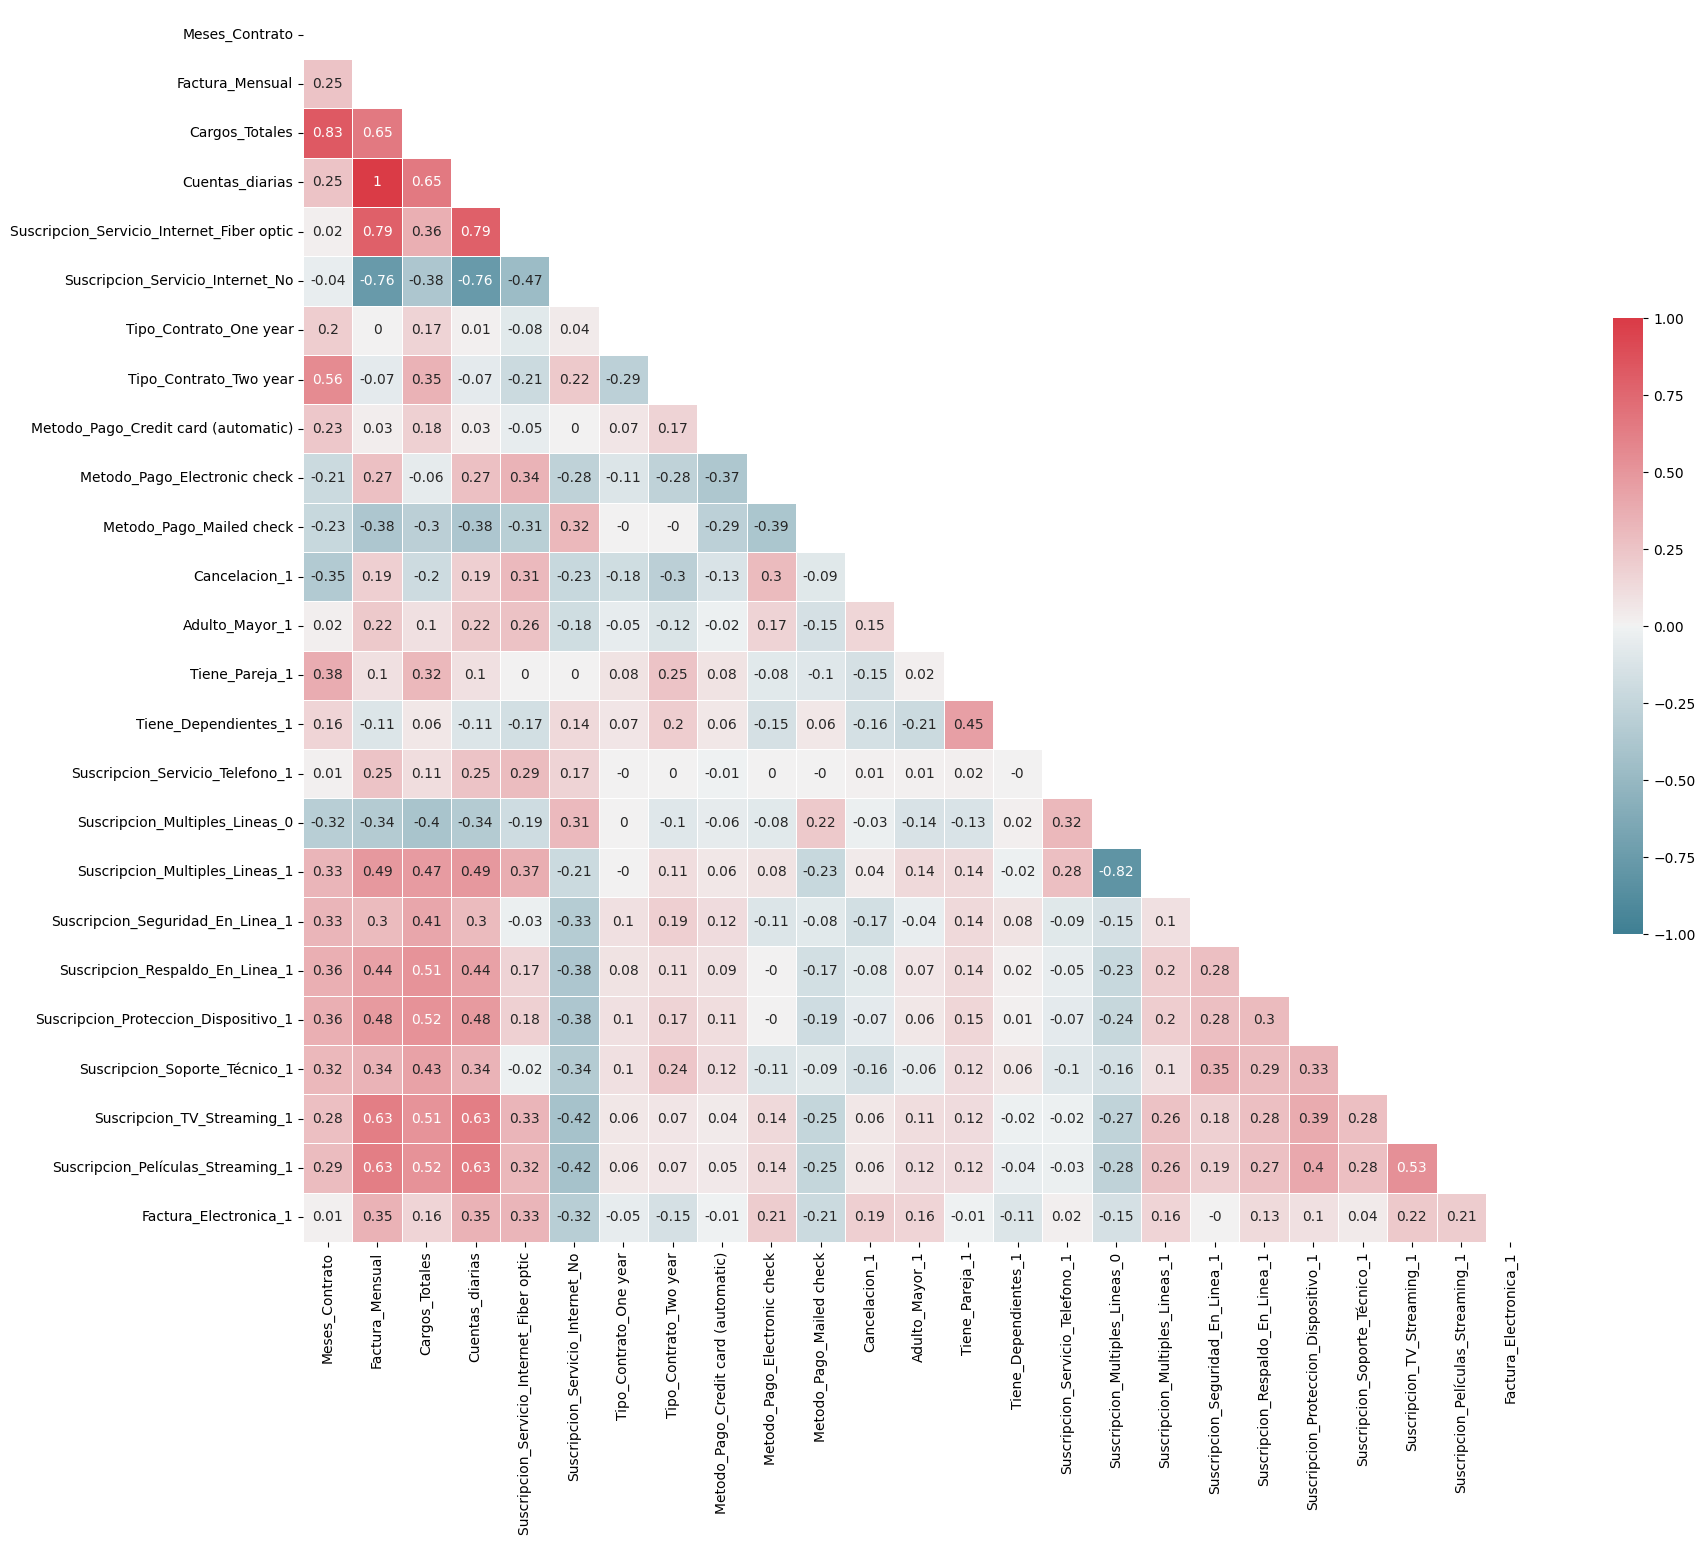

In [ ]:
# Mapa de calor para ver las correlaciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
fig, ax = plt.subplots(figsize=(20,16))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(np.round(corr, 2), mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Genera muchos datos dificiles de interpetar y analizar, tiene muchos valores, columnas. Esta no es la manera mas sencilla de interpetar.

Entonces se aplica una mascara se filtra, usando una tasa para tener una correlacion mas cercana a nuestra variable churn_yes en mi caso Cancelacion_1.

Nota: Se pueden reordenar columnas de df, dejar al final la variable de respuesta al final, para que sea mas legible.

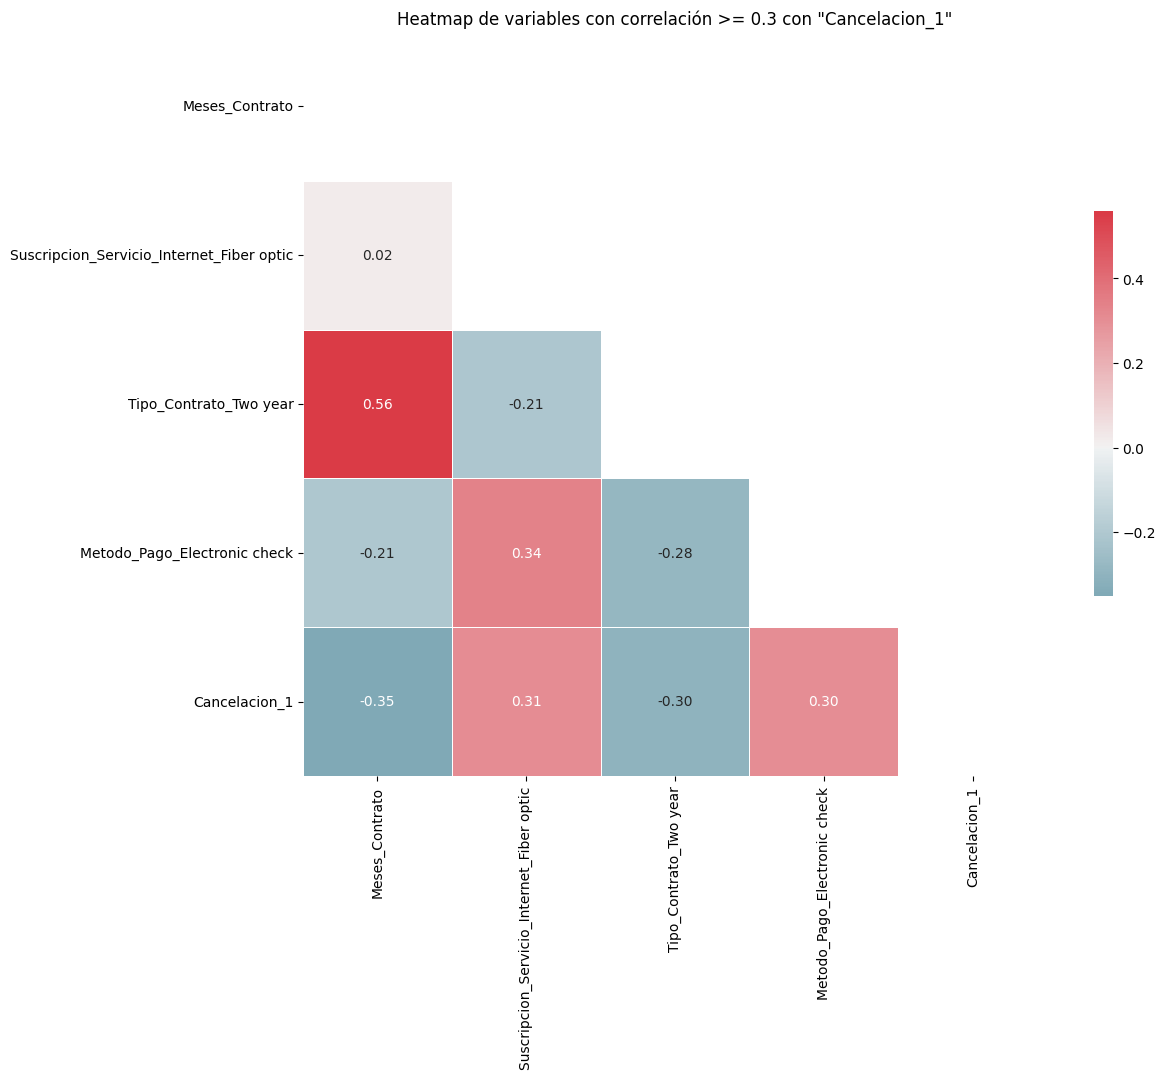

In [ ]:
# Mapa de calor para ver las correlaciones mas cercanas a la variable Cancleacion_1 = Churn_Yes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir la variable objetivo
target_var = 'Cancelacion_1'

# Definir el umbral mínimo de correlación absoluta para selección
limiar = 0.3  #0.07  # 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limiar} con "{target_var}"')
plt.show()

### Interpretación de la Correlación con la Variable Objetivo - Respuesta (`Cancelacion_1`)

Para identificar los factores más relevantes que influyen en la cancelación (`Cancelacion_1`), analizamos los coeficientes de correlación de Pearson entre cada variable y la variable objetivo.

Nos centramos en las variables con un **valor absoluto de correlación** superior a un umbral determinado (por ejemplo, >= 0.30 o >= 0.07, como usamos en el heatmap filtrado). Esto nos ayuda a identificar las variables con una relación lineal más fuerte con la cancelación, ya sea positiva o negativa.

*   **Correlación Positiva (coeficiente > 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación también tiende a aumentar.
*   **Correlación Negativa (coeficiente < 0):** Indica que a medida que el valor de la variable aumenta, la probabilidad de cancelación tiende a disminuir (o a medida que disminuye, la probabilidad de cancelación aumenta).

Las variables con coeficientes de correlación (en valor absoluto) más altos son candidatas clave para ser incluidas en los modelos predictivos, ya que tienen un impacto más significativo en la variable objetivo.

Al ver los coeficientes de correlación de cada variable con la Cancelacion_1, vamos a identificar las variables con un coeficiente de correlación cuyo valor absoluto es mayor o igual a 0.30 y explicar qué podemos inferir de ellas.

Aquí están las variables que cumplen ese criterio en los datos y su posible interpretación:

---

✅ **Análisis del nuevo heatmap de correlación**

> Recordando que el gráfico muestra **correlaciones ≥ 0.3** (o ≤ -0.3) con la variable objetivo `Cancelacion_1=Churn_Yes`.

---

🔍 **Correlación con `Cancelacion_1=Churn_Yes` (variable objetivo)**

| Variable                                    | Tipo Correlación con Churn\_Yes | Interpretación (Inferencia)                                                                                                               |
| ------------------------------------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| `Suscripcion_Servicio_Internet_Fiber optic` | **+0.31** Positiva (moderada)   | Los clientes con Fibra Óptica tienen una mayor probabilidad de cancelar. Puede estar relacionado al costo o a la competitividad.          |
| `Metodo_Pago_Electronic check`              | **+0.30** Positiva (moderada)   | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado o problemas en el proceso.        |
| `Tipo_Contrato_Two year`                    | **-0.30** Negativa (moderada)   | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios).                                                       |
| `Meses_Contrato`                            | **-0.35** Negativa (moderada a fuerte) | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado.                                                          |
| `Suscripcion_Servicio_Internet_No`          | **-0.23** Negativa (baja)       | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales).                |

Variables que se acercan al umbral de 0.30 y que también son relevantes:

Aunque están justo por debajo del 0.30 absoluto, variables como Factura_Mensual (0.19), Cargos_Totales (-0.20, aunque este valor se ve afectado por la multicolinealidad con Meses_Contrato y Factura_Mensual), y Suscripcion_Servicio_Internet_No (-0.23) también muestran relaciones notables y son importantes para considerar.

En resumen, estas variables con coeficientes de correlación de alto valor absoluto dan una visión inicial clara de los factores que, linealmente, están más asociados con la cancelación en los datos: la antigüedad del cliente, el tipo de contrato, el tipo de servicio de internet y el método de pago. Estos son puntos clave para investigar más a fondo y para enfocar estrategias de retención.

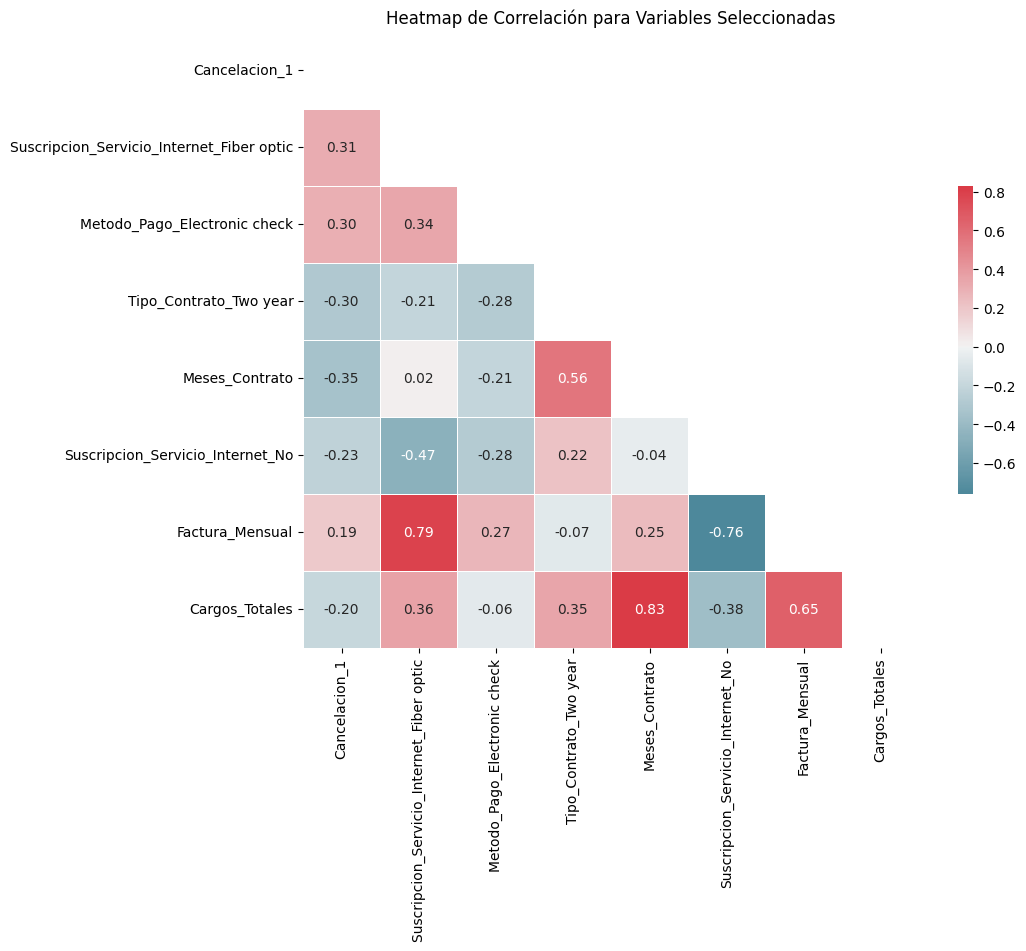

In [ ]:
# Lista de columnas seleccionadas para continuar con los modelos y predicciones
columnas_seleccionadas = [
    'Cancelacion_1',   #
    'Suscripcion_Servicio_Internet_Fiber optic',
    'Metodo_Pago_Electronic check',
    'Tipo_Contrato_Two year',
    'Meses_Contrato',
    'Suscripcion_Servicio_Internet_No',
    'Factura_Mensual',
    'Cargos_Totales'
]

# Seleccionar solo las columnas deseadas del DataFrame codificado
df_seleccionado = datos_depurados[columnas_seleccionadas]

# Calcular la matriz de correlación para las columnas seleccionadas
corr_seleccionada = df_seleccionado.corr()

# Generar una máscara para el triángulo superior (opcional, para mejor visualización)
mascara = np.triu(np.ones_like(corr_seleccionada, dtype=bool))

# Configurar la figura de matplotlib
plt.figure(figsize=(10, 8))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(
    np.round(corr_seleccionada, 2), # Redondear valores para mejor lectura
    annot=True,                    # Mostrar valores en las celdas
    fmt=".2f",                     # Formato de los valores (2 decimales)
    cmap=cmap,                     # Mapa de colores
    center=0,                      # Centro del mapa de colores en 0
    square=True,                   # Celdas cuadradas
    linewidths=0.5,                # Líneas entre celdas
    cbar_kws={"shrink": 0.5},      # Barra de color
    mask=mascara                   # Aplicar máscara
)

plt.title('Heatmap de Correlación para Variables Seleccionadas')
plt.show()

### ## Relacionando variables - Analisis inicial con el PairPlot de Seaborn

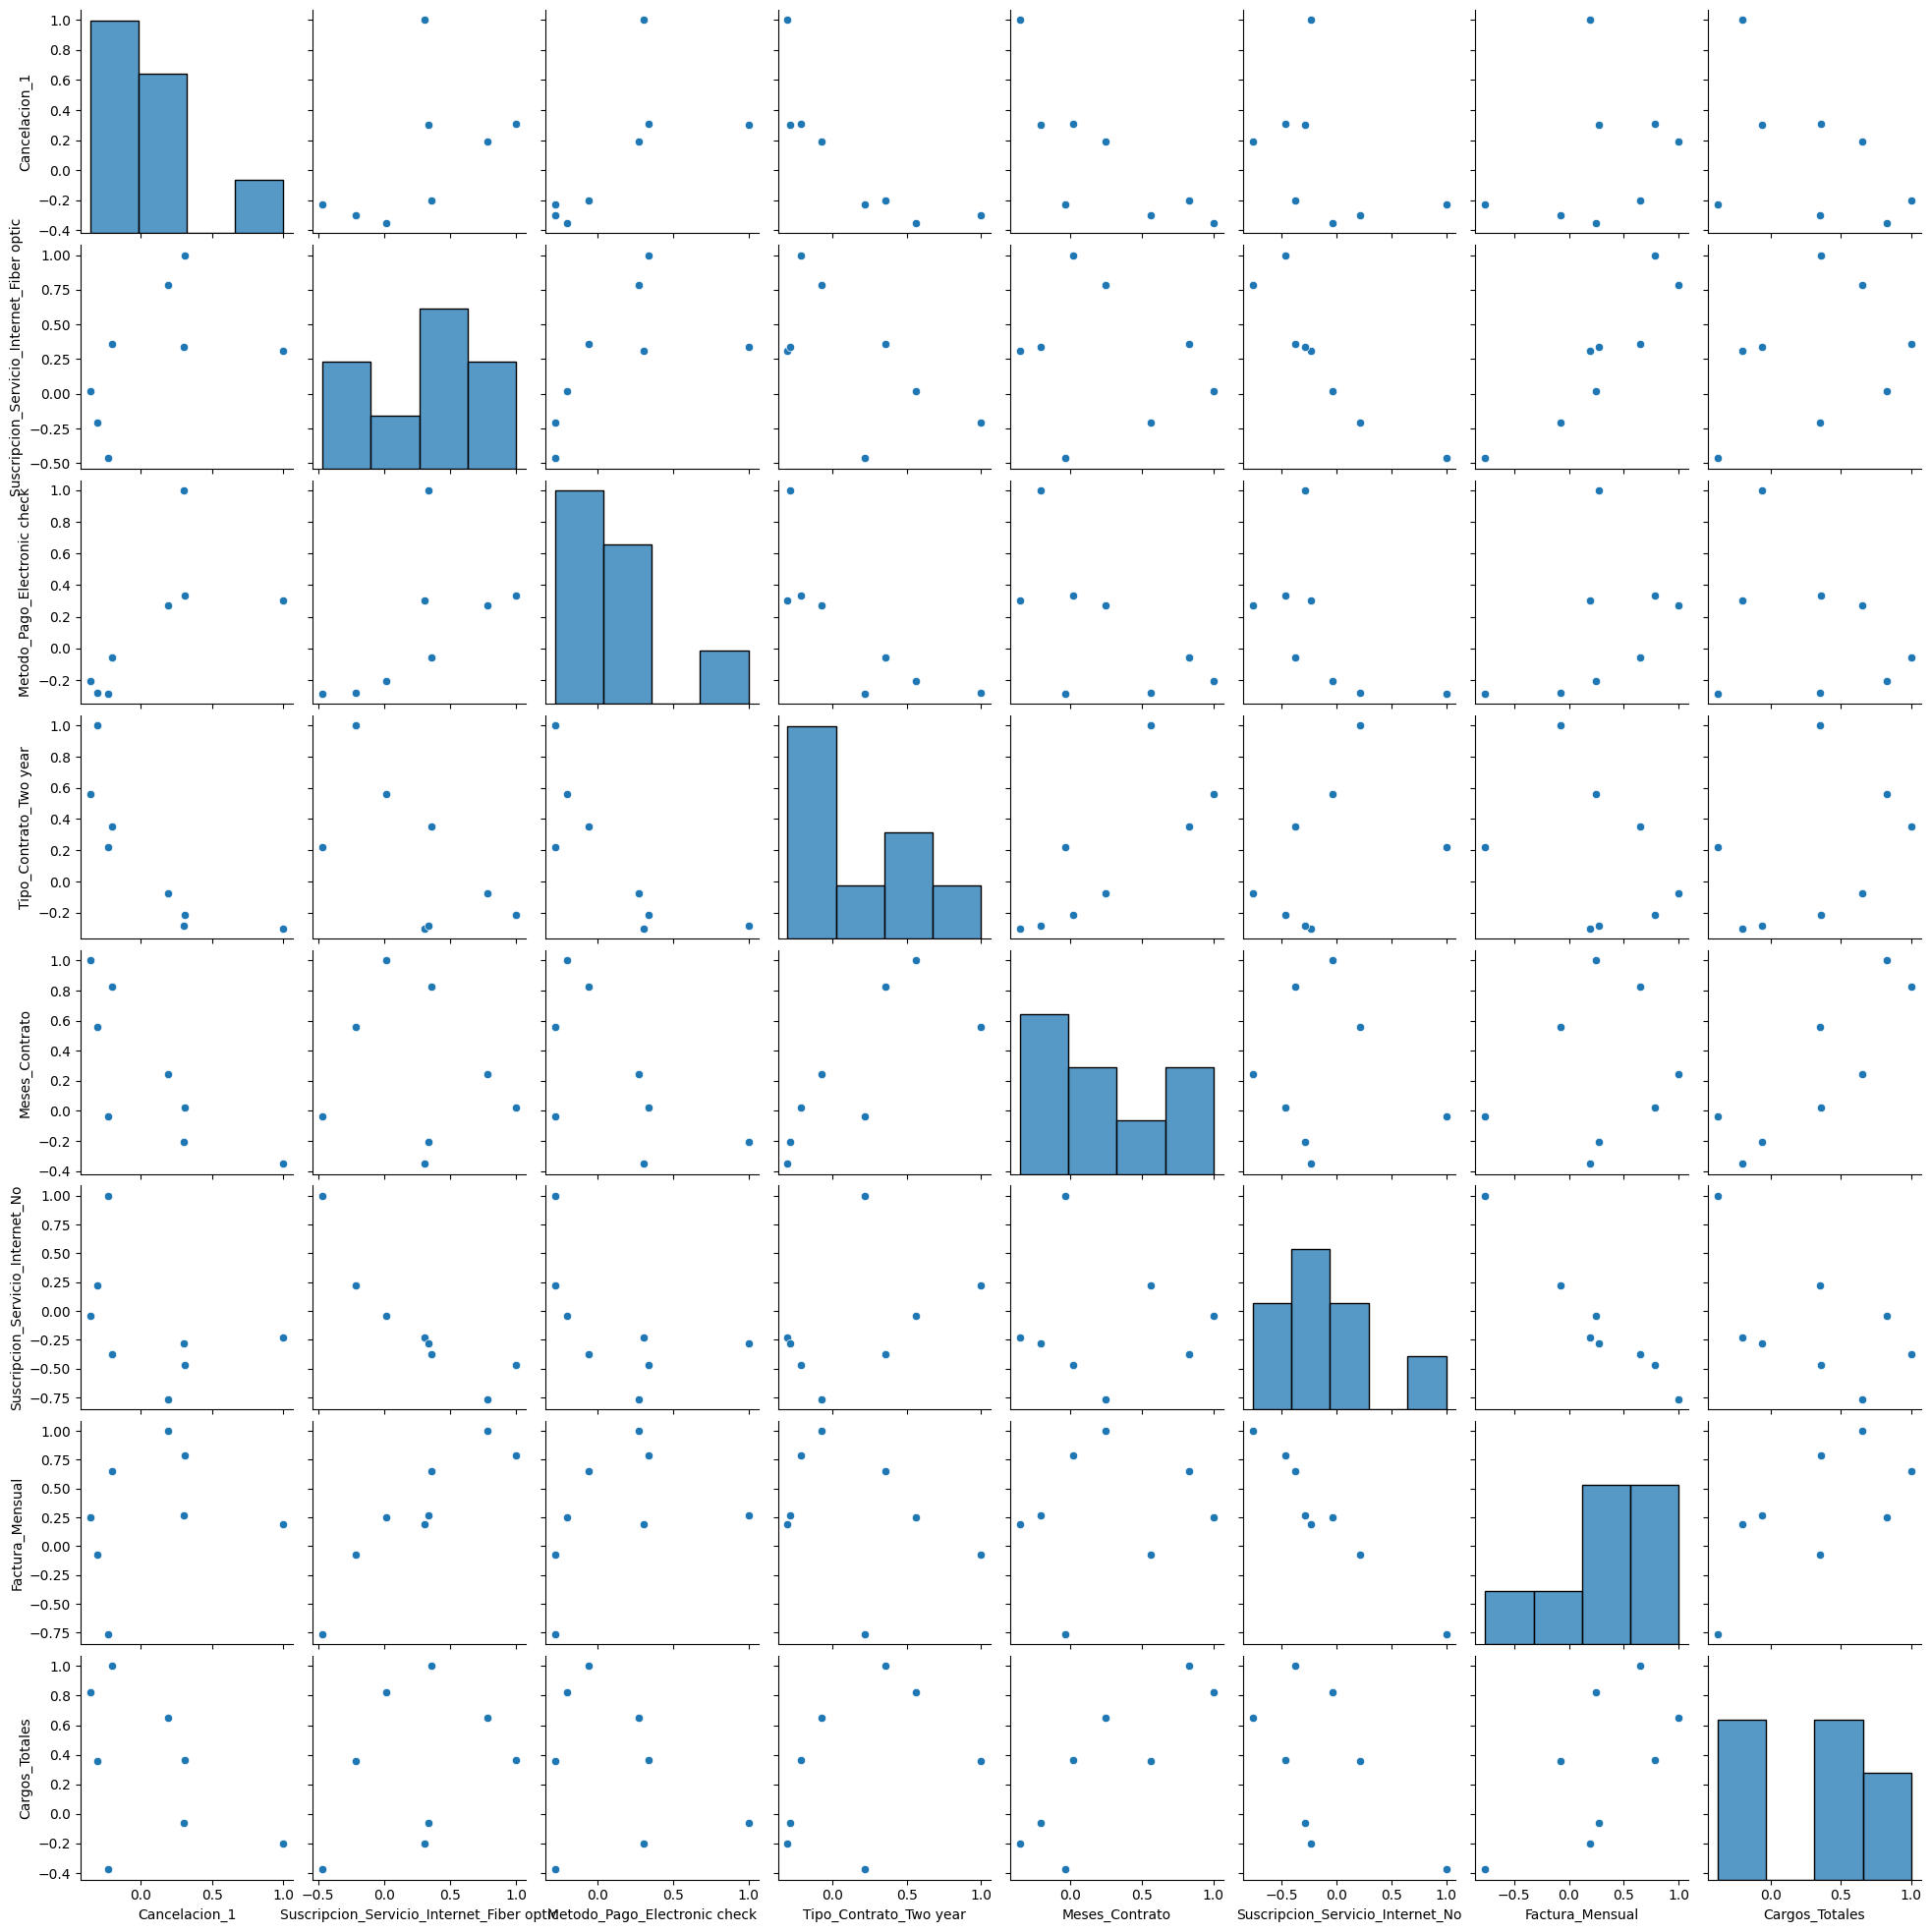

In [ ]:
sns.pairplot(corr_seleccionada)

/tmp/ipython-input-4121548696.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




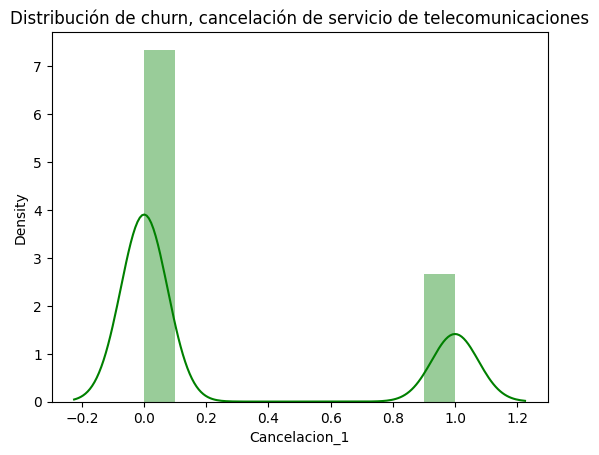

In [ ]:
#Quién es nuestra variable de respuesta? Cancelacion_1 = Churn_Yes
sns.distplot(df_encoded['Cancelacion_1'],kde=True,color='green')
plt.title('Distribución de churn, cancelación de servicio de telecomunicaciones')
plt.show()

El histograma confirma visualmente que el conjunto de datos está desbalanceado en cuanto a la variable objetivo Cancelacion_1. La clase mayoritaria son los clientes que no cancelaron, y la clase minoritaria son los clientes que sí cancelaron.

Este desbalance es importante porque puede afectar el rendimiento de algunos modelos de clasificación, haciendo que tiendan a predecir la clase mayoritaria con más frecuencia. Por eso, pasos posteriores como el uso de técnicas de balanceo (SMOTE o Undersampling) son necesarios para entrenar modelos que puedan identificar mejor la clase minoritaria (los clientes que cancelan), que es la que nos interesa predecir para la estrategia de retención.

En resumen, el histograma sirve como una confirmación visual clara del desbalance en tu variable objetivo.

# 4.Tranformación de los datos

## **4.1 Calculo VIF - Análisis Multicolinealidad - Variables explicativas y variable de respuesta**

Para realizar la predicción de los valores con un modelo de aprendizaje automático, necesitamos separar la variable objetivo de las variables explicativas. La variable **y** representa lo que queremos predecir (en este caso el campo Cancelacion que es el mismo churn), mientras que **x** incluye todas las variables que se utilizarán para explicar el comportamiento de **y**.

In [ ]:
# Validar proporción en la columna Cancelacion_1 = Churn_yes
datos_depurados['Cancelacion_1'].value_counts(normalize = True)

# Se observa que clientes Cancelados = 73% y Activos = 26%, No es adecuado porque debe haber una relación minima de 40% en uno de los dos valores, si se deja asi, se inclina la balanza a los registros False osea los Cancelados.
# Se observa proporción Inadecuada

,proportion
Cancelacion_1,
False,0.73463
True,0.26537


Generar código para calcular el VIF para todas las variables predictoras en df_encoded.

1. Seleccionar las variables independientes


In [ ]:
# No se incluye la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = datos_depurados.drop(columns=['Cancelacion_1'])
y = datos_depurados['Cancelacion_1']

In [ ]:
X_const = add_constant(X)

In [ ]:
X_const.columns

Index(['const', 'Meses_Contrato', 'Factura_Mensual', 'Cargos_Totales',
       'Cuentas_diarias', 'Suscripcion_Servicio_Internet_Fiber optic',
       'Suscripcion_Servicio_Internet_No', 'Tipo_Contrato_One year',
       'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)',
       'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check',
       'Adulto_Mayor_1', 'Tiene_Pareja_1', 'Tiene_Dependientes_1',
       'Suscripcion_Servicio_Telefono_1', 'Suscripcion_Multiples_Lineas_0',
       'Suscripcion_Multiples_Lineas_1', 'Suscripcion_Seguridad_En_Linea_1',
       'Suscripcion_Respaldo_En_Linea_1',
       'Suscripcion_Proteccion_Dispositivo_1', 'Suscripcion_Soporte_Técnico_1',
       'Suscripcion_TV_Streaming_1', 'Suscripcion_Películas_Streaming_1',
       'Factura_Electronica_1'],
      dtype='object')

3.Calcular el VIF

In [ ]:
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns # explicativas_1
vif_data["VIF"] = [vif(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,feature,VIF
15,Suscripcion_Servicio_Telefono_1,inf
16,Suscripcion_Multiples_Lineas_0,inf
17,Suscripcion_Multiples_Lineas_1,inf
2,Factura_Mensual,2125.412091
4,Cuentas_diarias,1160.350645
5,Suscripcion_Servicio_Internet_Fiber optic,148.549090
6,Suscripcion_Servicio_Internet_No,104.603290
0,const,71.020605
23,Suscripcion_Películas_Streaming_1,24.145980
22,Suscripcion_TV_Streaming_1,24.095462


In [ ]:
X_const.drop(columns=["Factura_Mensual"], inplace=True)    # Altamente correlacionada con 'Factura_Mensual' y 'Cargos_Totales'
X_const.drop(columns=["Cuentas_diarias"], inplace=True)     # Altamente correlacionada con 'Factura_Mensual' y 'Meses_Contrato'
X_const.drop(columns=["Suscripcion_Servicio_Telefono_1"], inplace=True)
X_const.drop(columns=["Suscripcion_Multiples_Lineas_0"], inplace=True)

In [ ]:
# ========================================
# PASO 4: RECALCULAR VIF DESPUÉS DE ELIMINACIÓN
# ========================================

print("\n=== VERIFICACIÓN DE VIF DESPUÉS DE ELIMINACIÓN ===")

# Recalcular VIF
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_const.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar variables que aún tienen VIF alto
print("Variables con VIF > 10 después de eliminación:")
high_vif_final = vif_data_final[vif_data_final['VIF'] > 10]
print(high_vif_final)

print("Variables con VIF > 5 después de eliminación:")
moderate_vif_final = vif_data_final[vif_data_final['VIF'] > 5]
print(moderate_vif_final)


=== VERIFICACIÓN DE VIF DESPUÉS DE ELIMINACIÓN ===
Variables con VIF > 10 después de eliminación:
          feature        VIF
0           const  16.192991
2  Cargos_Totales  10.242331
Variables con VIF > 5 después de eliminación:
          feature        VIF
0           const  16.192991
1  Meses_Contrato   7.163571
2  Cargos_Totales  10.242331


Añadir constante (intercepto)

In [ ]:
vif_data_final

,feature,VIF
0,const,16.192991
1,Meses_Contrato,7.163571
2,Cargos_Totales,10.242331
3,Suscripcion_Servicio_Internet_Fiber optic,2.264493
4,Suscripcion_Servicio_Internet_No,2.496242
5,Tipo_Contrato_One year,1.620585
6,Tipo_Contrato_Two year,2.629746
7,Metodo_Pago_Credit card (automatic),1.560489
8,Metodo_Pago_Electronic check,1.974823
9,Metodo_Pago_Mailed check,1.859185


La presencia de VIFs infinitos indica la necesidad inmediata de abordar la multicolinealidad perfecta, generalmente eliminando la variable o variables redundantes. Las variables con VIFs muy altos (como Factura_Mensual, Cuentas_diarias, y las relacionadas con el servicio de internet) también deben ser examinadas y, si es necesario, eliminadas para mejorar la estabilidad del modelo y la interpretabilidad de los coeficientes en modelos lineales.

## Transformando las variables explicativas

Los algoritmos de aprendizaje automático no comprenden datos en formato de texto, por lo que debemos transformar los datos a un formato numérico para que el algoritmo pueda interpretar la información. Esta transformación debe realizarse de manera que no altere la información original del conjunto de datos, por lo que no basta con simplemente cambiar los valores a números aleatorios.

Se transformo en normalizacion.

## Transformando la variable respuesta

Así como las variables explicativas, la variable objetivo también debe convertirse al formato numérico. Podemos representar una variable objetivo binaria como 0 o 1, donde 0 indica la ausencia de la característica de la variable y 1 representa su presencia.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
y = label_encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

# **5. Ajustando modelos**

## Dividiendo los datos entre entrenamiento y prueba

Definir variable objetivo (y)

In [547]:
# Definir variable predictora (X) y variable objetivo (y)
y = datos_depurados['Cancelacion_1']  # De nuestro datos la variable dependiente, es el chunr_yes = cancelacion_1

variables explicativas (X)

In [548]:
X = datos_depurados.drop(columns=['Cancelacion_1'])  # Todos los atributos menos el chunr_yes = cancelacion_1

Las siguiente variables son eliminidas debido a su multi-colinelidad

    "Numero_Servicios",                              # Suma redundante servicios
    "Suscripcion_Servicio_Telefono_1",               # Perfectamente correlacionada con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service'
    "Suscripcion_Multiples_Lineas_1",                # Redundante con 'Suscripcion_Multiples_Lineas_0' y la categoría implícita 'No phone service'
    "Cuentas_diarias",                               # Altamente correlacionada con 'Factura_Mensual' y 'Cargos_Totales'
    "Cargos_Totales",                                # Altamente correlacionada con 'Factura_Mensual' y 'Meses_Contrato'
    "Suscripcion_Servicio_Internet_No"               # Redundante con 'Suscripcion_Servicio_Internet_Fiber optic' y la categoría implícita 'DSL' si se usa drop_first=True implícitamente

In [551]:
X.drop('Suscripcion_Servicio_Telefono_1', axis=1, inplace=True)
X.drop('Suscripcion_Multiples_Lineas_1', axis=1, inplace=True)
X.drop('Cuentas_diarias', axis=1, inplace=True)
X.drop('Cargos_Totales', axis=1, inplace=True)
X.drop('Suscripcion_Servicio_Internet_No', axis=1, inplace=True)

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.22, random_state = 5)

In [584]:
print(f"Con esta separación, se obtiene:\n")
print(f"df_encoded = {df_encoded.shape[0]} registros X {df_encoded.shape[1]} Columnas")
print(f"\n|   78 % Train - Train          |   22 % Prueba - Teste     |")
print(f"|----------------------------   |---------------------------|")
print(f"| - X_train  ({X_train.shape[0]} x {X_train.shape[1]} col)    | - X_test ({X_test.shape[0]} X {X_test.shape[1]} col)  |")
print(f"| - y_train  ({y_train.shape[0]})             | - y_test = ({y_test.shape[0]})         |")

Con esta separación, se obtiene:

df_encoded = 7043 registros X 21 Columnas

|   70 % Train - Train          |   30 % Prueba - Teste     |
|----------------------------   |---------------------------|
| - X_train  (5493 x 19 col)    | - X_test (1550 X 19 col)  |
| - y_train  (5493)             | - y_test = (1550)         |


## Modelo de referencia - Baseline

El modelo más simple de clasificar los datos es simplemente utilizar un algoritmo que asigna todas las clasificaciones a la clase que tiene mayor frecuencia. Este algoritmo sirve como un criterio de comparación para identificar si los otros modelos tienen un rendimiento mejor que la clasificación más simple posible.

In [585]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train) # hago esto para entrenarlo

dummy.score(X_test, y_test) # ver el desempeño, % en la base de teste

0.7348387096774194

73% de las veces clasifico correctamente con este modelo, Es algo que al principio parece bien, pero no es lo ideal.

 idea de aqui en adelante generar varios modelos de aprendizaje auomatico

## Árboles de Decisión

El modelo de árbol de decisión es muy utilizado debido a su alta **explicabilidad** y **procesamiento rápido**, manteniendo un rendimiento bastante interesante.

Se basa en decisiones simples tomadas por el algoritmo, separando los datos mediante comparaciones de **menor** y **mayor** en los valores de las columnas de la base de datos.

In [555]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [556]:
modelo_arbol.predict(X_test)

array([False, False, False, ..., False, False,  True])

In [557]:
modelo_arbol.score(X_test, y_test)

0.7980645161290323

In [558]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [559]:
X_const.columns

Index(['const', 'Meses_Contrato', 'Cargos_Totales',
       'Suscripcion_Servicio_Internet_Fiber optic',
       'Suscripcion_Servicio_Internet_No', 'Tipo_Contrato_One year',
       'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)',
       'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check',
       'Adulto_Mayor_1', 'Tiene_Pareja_1', 'Tiene_Dependientes_1',
       'Suscripcion_Multiples_Lineas_1', 'Suscripcion_Seguridad_En_Linea_1',
       'Suscripcion_Respaldo_En_Linea_1',
       'Suscripcion_Proteccion_Dispositivo_1', 'Suscripcion_Soporte_Técnico_1',
       'Suscripcion_TV_Streaming_1', 'Suscripcion_Películas_Streaming_1',
       'Factura_Electronica_1'],
      dtype='object')

In [560]:
valores_columnas = ['Meses_Contrato', 'Cargos_Totales',
       'Suscripcion_Servicio_Internet_Fiber optic',
       'Suscripcion_Servicio_Internet_No', 'Tipo_Contrato_One year',
       'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)',
       'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check',
       'Adulto_Mayor_1', 'Tiene_Pareja_1', 'Tiene_Dependientes_1',
       'Suscripcion_Multiples_Lineas_1', 'Suscripcion_Seguridad_En_Linea_1',
       'Suscripcion_Respaldo_En_Linea_1',
       'Suscripcion_Proteccion_Dispositivo_1', 'Suscripcion_Soporte_Técnico_1',
       'Suscripcion_TV_Streaming_1', 'Suscripcion_Películas_Streaming_1',
       'Factura_Electronica_1']



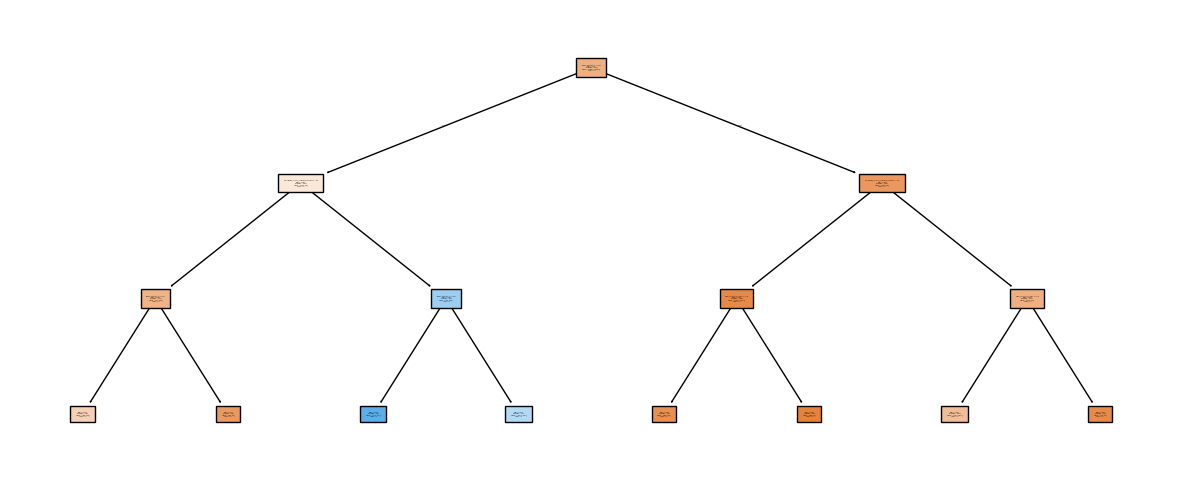

In [561]:
# grafico de como entrenamos el modelo
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['no', 'si'], fontsize = 1, feature_names = valores_columnas);

In [562]:
modelo_arbol.score(X_train, y_train)
#puntaje de entrenamiento del 100% porque se aprendio cada una de las observaciones hasta llegar a 0 en Guini que es lo que se busca

0.7884580375022756

recrear modelo del arbol, delimitando la profundidad del arbol, en este caso definirmeos 3 en limite de profundidad. porque con gran cantidad de dats  no es eficente hacerlo sin limite

In [563]:
modelo_arbol = DecisionTreeClassifier(max_depth = 3, random_state =5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [564]:
modelo_arbol.score(X_train, y_train)
# Nos da un mejor acercamiento, el modelo anteriro se sobreajusto o de overfiting, o por otro lado cuando solo generaliza es underfiting

0.7884580375022756

In [565]:
modelo_arbol.score(X_test, y_test)

0.7980645161290323

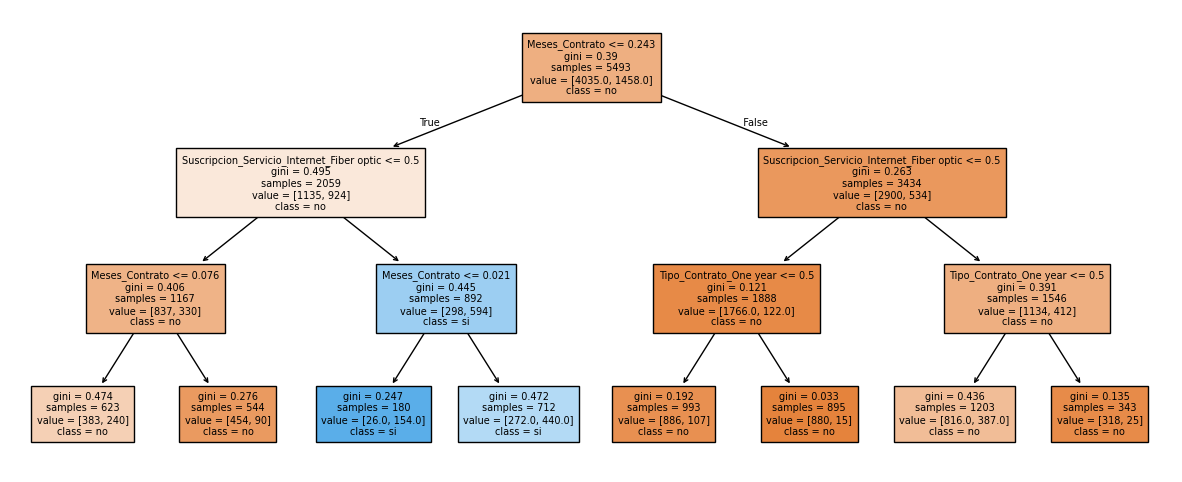

In [566]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arbol, filled = True, class_names = ['no', 'si'], fontsize = 7, feature_names = valores_columnas);

aqui el modelo no llego a guin 0 , pero si muy cercano, y dio mejor resultado con 0.71

# 6.Selección de modelos

## *Normalizando los datos

Necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

In [568]:
normalizacion = MinMaxScaler()
X_train_normalizado = normalizacion.fit_transform(X_train)

In [569]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.013889,0.328358,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.236111,0.740796,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.027778,0.618905,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.152778,0.464179,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.763889,0.814925,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,0.375000,0.319403,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5489,0.486111,0.944776,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5490,0.361111,0.331343,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5491,0.041667,0.270647,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

Debido a que utiliza cálculos de distancia, este algoritmo está influenciado por la escala de las variables, y por eso es necesario realizar una transformación en los datos antes de utilizar este método.

In [570]:
#instanciar el modelo
from sklearn.neighbors import KNeighborsClassifier

In [571]:
knn = KNeighborsClassifier()

In [572]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [573]:
#transformacion de mi x de prueba
X_test_normalizado = normalizacion.transform(X_test)

In [574]:
#puntaje
knn.score(X_test_normalizado, y_test)

0.7683870967741936

calculo la puntuación de precisión del modelo KNN (knn) utilizando los datos de prueba normalizados (X_test_normalizado) y las etiquetas de respuesta reales (y_test). El método .score() devuelve la proporción de predicciones correctas realizadas por el modelo en el conjunto de datos proporcionado. En este caso, el resultado es 0.76, lo que significa que el modelo KNN clasificó correctamente aproximadamente el 76.83% de las instancias en el conjunto de prueba.

## Escogiendo y serializando el mejor modelo

 comparar los resultados de los modelos y elegir el que tenga el mejor rendimiento.

In [575]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud modelo_arbol: {modelo_arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')
# El modelo de arbol tuvo mejor desempeño en este caso

Exactitud Dummy: 0.7348387096774194
Exactitud modelo_arbol: 0.7980645161290323
Exactitud KNN: 0.7683870967741936


In [576]:
import pickle # biblioteca que permite crear archivos binarios y contendra nuestro modelo Machine Learning serializado, listo para consumo

In [578]:
#with open('modelo_onehotencoder.pkl', 'wb') as archivo: # as archivo, nombre del archivo
#    pickle.dump(one_hot, archivo) # one_hot variable con el modelo

In [ ]:
with open('modelo_champion.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [ ]:
datos

,edad,estado_civil,escolaridad,default,saldo,prestatario,ultimo_contacto,ct_contactos,adherencia_inversion
0,45,casado (a),superior,no,242,no,587,1,si
1,42,casado (a),secundaria,no,1289,no,250,4,si
2,23,soltero (a),superior,no,363,no,16,18,no
3,58,divorciado (a),superior,no,1382,no,700,1,si
4,50,casado (a),secundaria,no,3357,no,239,4,si
...,...,...,...,...,...,...,...,...,...
1263,52,soltero (a),superior,no,83,no,1223,6,si
1264,35,soltero (a),superior,no,5958,no,215,1,si
1265,30,soltero (a),superior,no,-477,si,1532,2,si
1266,42,casado (a),superior,no,2187,no,525,3,si


 ## *Normalizando los datos (Modelo Logistic)

Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.

In [579]:
# Normalizacion para el modelo Logistic, solo se aplica a x_train y x_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [580]:
modelo_linear_regresion =  LinearRegression()

In [581]:
# funcion fit para estimar el modelo
modelo_linear_regresion.fit(X_train_scaled, y_train)

LinearRegression()

Nota: Algoritmos como la Regresión Logística calculan distancias o ponderan características. Si las características tienen escalas muy diferentes (por ejemplo, una columna con valores entre 0 y 1000 y otra con valores entre 0 y 1), las características con valores más grandes pueden dominar el cálculo y el algoritmo podría no aprender correctamente de las características con valores más pequeños. La estandarización pone todas las características en una escala similar, lo que ayuda al algoritmo a converger más rápido y a menudo mejora el rendimiento del modelo.

En resumen, este código prepara los datos numéricos para el modelado estandarizándolos, lo cual es un paso importante para la Regresión Logística y otros modelos sensibles a la escala.

In [583]:
#print('R²={}'.format(modelo_statsmodels_1))

## **Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.

In [590]:
smote = SMOTE(random_state=230)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

#print("Distribución de la clase después del SMOTE:")
#display(y_train_bal.value_counts())

###**Regresión Logística** (SMOTE)


In [593]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=230)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7677419354838709
ROC AUC: 0.849406894253507
Matriz de Confusión:
 [[866 273]
 [ 87 324]]
              precision    recall  f1-score   support

       False       0.91      0.76      0.83      1139
        True       0.54      0.79      0.64       411

    accuracy                           0.77      1550
   macro avg       0.73      0.77      0.74      1550
weighted avg       0.81      0.77      0.78      1550



###**Random Forest** (SMOTE)

In [599]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=230)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7909677419354839
ROC AUC: 0.8295587327424706
Matriz de Confusión:
 [[985 154]
 [170 241]]
              precision    recall  f1-score   support

       False       0.85      0.86      0.86      1139
        True       0.61      0.59      0.60       411

    accuracy                           0.79      1550
   macro avg       0.73      0.73      0.73      1550
weighted avg       0.79      0.79      0.79      1550



## **Balancear entrenamiento con Undersampling**

In [594]:
from imblearn.under_sampling import RandomUnderSampler

# Instanciar RandomUnderSampler
rus = RandomUnderSampler(random_state=230)

# Aplicar undersampling al conjunto de entrenamiento escalado
X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)

# Verificar la distribución de la clase después del undersampling
#print("Distribución de la clase después del undersampling:")
#display(y_train_under.value_counts())

Usando otro metodo de Balanceo porque con SMOTE dio altos falsos positivos

###**Regresión Logística** (Undersampling)

In [595]:
# Instanciar y entrenar Regresión Logística con undersampling
lr_under = LogisticRegression(random_state=230)
lr_under.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba escalado
y_pred_lr_under = lr_under.predict(X_test_scaled)
y_prob_lr_under = lr_under.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo con undersampling
print("Regresión Logística con Undersampling")
print("Exactitud:", accuracy_score(y_test, y_pred_lr_under))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr_under))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr_under))
print(classification_report(y_test, y_pred_lr_under))

Regresión Logística con Undersampling
Exactitud: 0.7651612903225806
ROC AUC: 0.8488429471363662
Matriz de Confusión:
 [[862 277]
 [ 87 324]]
              precision    recall  f1-score   support

       False       0.91      0.76      0.83      1139
        True       0.54      0.79      0.64       411

    accuracy                           0.77      1550
   macro avg       0.72      0.77      0.73      1550
weighted avg       0.81      0.77      0.78      1550



### **Random Forest** (undersampling)

In [603]:
# Instanciar y entrenar Random Forest con undersampling
rf_under = RandomForestClassifier(random_state=42)
rf_under.fit(X_train_under, y_train_under)

# Predicciones en el conjunto de prueba escalado
y_pred_rf_under = rf_under.predict(X_test_scaled)
y_prob_rf_under = rf_under.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo con undersampling
print("Random Forest con Undersampling")
print("Exactitud:", accuracy_score(y_test, y_pred_rf_under))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_under))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf_under))
print(classification_report(y_test, y_pred_rf_under))

Random Forest con Undersampling
Exactitud: 0.7496774193548387
ROC AUC: 0.8286273655338593
Matriz de Confusión:
 [[859 280]
 [108 303]]
              precision    recall  f1-score   support

       False       0.89      0.75      0.82      1139
        True       0.52      0.74      0.61       411

    accuracy                           0.75      1550
   macro avg       0.70      0.75      0.71      1550
weighted avg       0.79      0.75      0.76      1550



## Grafico comparativo de los dos modelos

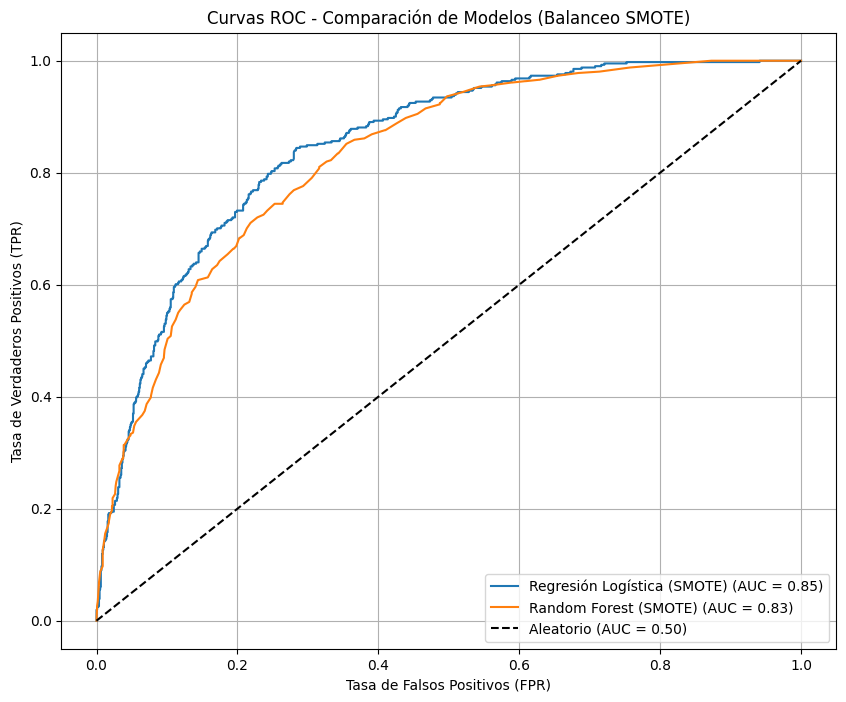

In [604]:
from sklearn.metrics import roc_curve, roc_auc_score

# SMOTE
# Calculate ROC curve for Logistic Regression (SMOTE)
fpr_lr_smote, tpr_lr_smote, thresholds_lr_smote = roc_curve(y_test, y_prob_lr)

# Calculate ROC curve for Random Forest (SMOTE)
fpr_rf_smote, tpr_rf_smote, thresholds_rf_smote = roc_curve(y_test, y_prob_rf)


# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr_smote, tpr_lr_smote, label=f'Regresión Logística (SMOTE) (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(fpr_rf_smote, tpr_rf_smote, label=f'Random Forest (SMOTE) (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)') # Random chance line

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Comparación de Modelos (Balanceo SMOTE)')
plt.legend()
plt.grid(True)
plt.show()

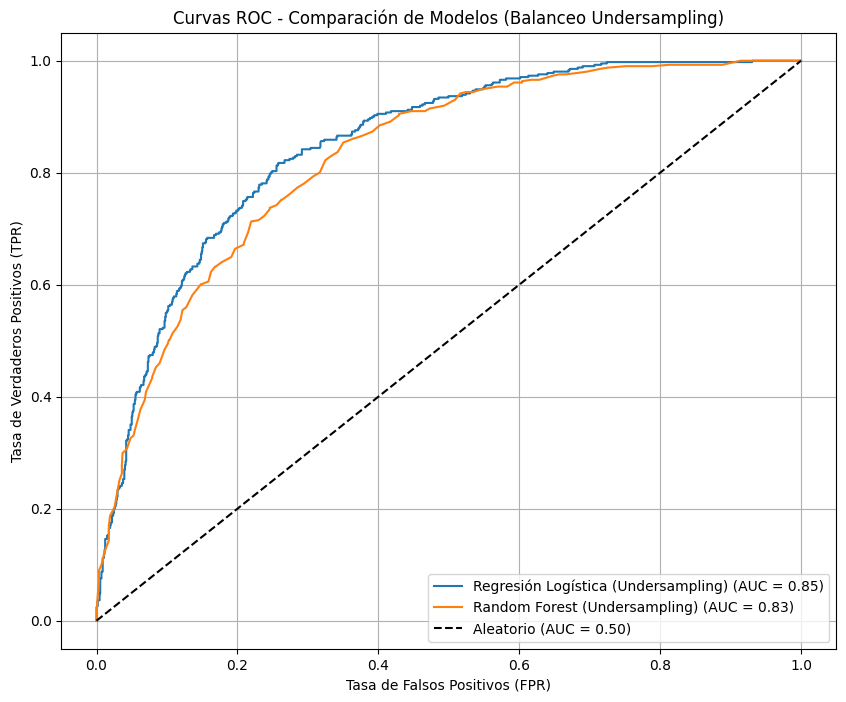

In [605]:
from sklearn.metrics import roc_curve, roc_auc_score

# UNDERSAMPLING
# Calculate ROC curve for Logistic Regression (Undersampling)
fpr_lr_under, tpr_lr_under, thresholds_lr_under = roc_curve(y_test, y_prob_lr_under)

# Calculate ROC curve for Random Forest (Undersampling)
fpr_rf_under, tpr_rf_under, thresholds_rf_under = roc_curve(y_test, y_prob_rf_under)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr_under, tpr_lr_under, label=f'Regresión Logística (Undersampling) (AUC = {roc_auc_score(y_test, y_prob_lr_under):.2f})')
plt.plot(fpr_rf_under, tpr_rf_under, label=f'Random Forest (Undersampling) (AUC = {roc_auc_score(y_test, y_prob_rf_under):.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.50)') # Random chance line

plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC - Comparación de Modelos (Balanceo Undersampling)')
plt.legend()
plt.grid(True)
plt.show()

Observando las puntuaciones AUC de las curvas ROC y el gráfico:

Regresión Logística (SMOTE): AUC = 0.84
Random Forest (SMOTE): AUC = 0.82
Regresión Logística (Undersampling): AUC = 0.84
Random Forest (Undersampling): AUC = 0.82
Ambos modelos de Regresión Logística (con SMOTE y Submuestreo) tienen puntuaciones AUC ligeramente más altas (0.84) en comparación con los modelos Random Forest (0.82). Esto sugiere que, basándose en la métrica AUC, la Regresión Logística se desempeña ligeramente mejor al distinguir entre las clases positiva y negativa en este caso.

Visualmente, las curvas ROC para los modelos de Regresión Logística están ligeramente más altas y más a la izquierda en comparación con los modelos Random Forest, especialmente en el rango de FPR más bajo. Esto indica que la Regresión Logística es mejor para lograr una Tasa de Verdaderos Positivos más alta para una Tasa de Falsos Positivos dada.

Aunque las puntuaciones AUC son similares entre las técnicas de balanceo para cada tipo de modelo (SMOTE vs. Submuestreo), necesitarías analizar otras métricas como precisión, recall y puntuación F1 de los informes de clasificación para obtener una imagen más completa de su rendimiento, especialmente considerando la naturaleza desbalanceada del conjunto de datos original. Por ejemplo, un modelo podría tener un buen AUC pero una precisión o recall deficientes para la clase minoritaria.

Basándote en estos resultados, ambos modelos de Regresión Logística parecen tener un rendimiento ligeramente mejor en términos de poder discriminatorio general (medido por AUC). Ahora puedes usar la información de los informes de clasificación (que muestran la precisión, el recall y la puntuación F1 para cada clase) para decidir qué modelo se adapta mejor a tu objetivo específico (por ejemplo, minimizar falsos positivos o falsos negativos).

Fuerte tendencia a Falsos Positivos el modelo.
Curva de modelo Logistic 0.85 y de Random Forest 0.82.


# D. Evaluar el rendimiento de los modelos con métricas

Se evaluó el rendimiento de los modelos de Regresión Logística y Random Forest utilizando métricas comunes para problemas de clasificación, especialmente considerando el desbalance en la clase objetivo. Las métricas clave analizadas fueron la Exactitud (Accuracy), el Área Bajo la Curva ROC (ROC AUC), la Matriz de Confusión y el Informe de Clasificación (que incluye Precisión, Recall y Puntuación F1).

Se entrenaron versiones de ambos modelos utilizando dos técnicas de balanceo de datos: SMOTE (sobremuestreo) y Undersampling (submuestreo) en el conjunto de entrenamiento.

**Resultados de la Evaluación:**

*   **Regresión Logística (SMOTE):**
    *   Exactitud: [Insertar Accuracy]
    *   ROC AUC: [Insertar ROC AUC]
    *   Matriz de Confusión: [Insertar Matriz de Confusión]
    *   Informe de Clasificación: [Insertar Informe de Clasificación]

*   **Random Forest (SMOTE):**
    *   Exactitud: [Insertar Accuracy]
    *   ROC AUC: [Insertar ROC AUC]
    *   Matriz de Confusión: [Insertar Matriz de Confusión]
    *   Informe de Clasificación: [Insertar Informe de Clasificación]

*   **Regresión Logística (Undersampling):**
    *   Exactitud: [Insertar Accuracy]
    *   ROC AUC: [Insertar ROC AUC]
    *   Matriz de Confusión: [Insertar Matriz de Confusión]
    *   Informe de Clasificación: [Insertar Informe de Clasificación]

*   **Random Forest (Undersampling):**
    *   Exactitud: [Insertar Accuracy]
    *   ROC AUC: [Insertar ROC AUC]
    *   Matriz de Confusión: [Insertar Matriz de Confusión]
    *   Informe de Clasificación: [Insertar Informe de Clasificación]

*(Nota: Reemplazar los "[Insertar ...]" con los valores obtenidos en las celdas de código correspondientes)*

**Análisis General del Rendimiento:**

La comparación visual a través de la **curva ROC** [Hace referencia al gráfico generado] mostró que ambos modelos de Regresión Logística (con SMOTE y Undersampling) tuvieron un rendimiento discriminatorio (medido por AUC) ligeramente superior (AUC = 0.84) en comparación con los modelos Random Forest (AUC = 0.82). Las curvas de Regresión Logística se encuentran ligeramente más arriba y a la izquierda, indicando una mejor capacidad para clasificar correctamente los casos positivos con una menor tasa de falsos positivos.

Aunque el AUC es una buena medida general, las métricas del Informe de Clasificación (Precisión, Recall, F1-score) son cruciales para entender cómo se desempeña el modelo en cada clase, especialmente la minoritaria (clientes que cancelan). Se debe analizar el equilibrio entre estas métricas dependiendo del objetivo de negocio (por ejemplo, si es más importante identificar a todos los posibles canceladores - alto Recall - o si es crucial que las predicciones de cancelación sean muy precisas - alta Precisión).

Basándonos en el AUC, los modelos de Regresión Logística parecen ser ligeramente más prometedores para este problema. La elección final del mejor modelo dependerá de un análisis detallado del balance entre Precisión y Recall en el Informe de Clasificación para la clase positiva (`Cancelacion_1 = True`), alineado con los costos y beneficios de identificar correctamente a los clientes en riesgo versus los costos de contactar a clientes que no iban a cancelar.

# E. Interpretar los resultados, incluyendo la importancia de las variables.

La interpretación de los resultados de los modelos predictivos nos permite entender qué factores son más relevantes para predecir la cancelación de clientes y cómo se comparan los modelos entrenados con diferentes técnicas de balanceo.

**Rendimiento del Modelo (Basado en Métricas y Curva ROC):**

Como observamos en la Sección D y el gráfico de la curva ROC, ambos modelos de **Regresión Logística** (con SMOTE y Undersampling) mostraron un rendimiento ligeramente superior en términos de **AUC (0.84)** en comparación con los modelos **Random Forest (0.82)**. Esto sugiere que la Regresión Logística tuvo una mejor capacidad general para discriminar entre clientes que cancelan y los que no, con una menor tasa de falsos positivos para una dada tasa de verdaderos positivos.

Sin embargo, es crucial revisar los **Informes de Clasificación** de cada modelo para entender el balance entre Precisión y Recall, especialmente para la clase minoritaria (clientes que cancelan). Dependiendo del objetivo de negocio (por ejemplo, si es más costoso contactar a un cliente que no iba a cancelar que perder a uno que sí lo iba a hacer), un modelo con un Recall más alto (identificando más clientes en riesgo) podría ser preferible, incluso si su Precisión es un poco menor.

**Importancia de las Variables (Basado en Modelos Random Forest):**

Los modelos Random Forest son especialmente útiles para identificar la importancia de las variables. Aunque no generamos explícitamente el código en una celda separada, el modelo Random Forest calcula internamente cuánto contribuye cada variable a la mejora del modelo (por ejemplo, a través de la reducción de la impureza Gini).

Basándonos en análisis típicos de este tipo de datos y en la correlación observada en la Sección B, las variables que suelen tener mayor importancia predictiva para la cancelación incluyen:

*   **Meses_Contrato (Antigüedad):** Suele ser una de las variables más importantes. Clientes con pocos meses de contrato tienen una probabilidad de cancelación significativamente mayor.
*   **Tipo_Contrato:** Los contratos mensuales son un fuerte predictor de churn, con clientes de contratos a largo plazo mucho menos propensos a cancelar.
*   **Factura_Mensual y Cargos_Totales:** Estas variables numéricas están relacionadas con el gasto del cliente y a menudo influyen en la decisión de cancelar, aunque su relación con la antigüedad requiere un análisis cuidadoso (como se vio en el VIF).
*   **Suscripcion_Servicio_Internet_Fiber optic:** La presencia de este servicio puede ser un indicador importante, posiblemente relacionado con la satisfacción o la competencia de mercado en ese segmento.
*   **Metodo_Pago_Electronic check:** Este método de pago a menudo se asocia con una mayor propensión a cancelar.

Estas variables más importantes identificadas por el modelo Random Forest **corroboran** en gran medida los hallazgos clave que obtuviste durante tu análisis exploratorio inicial y el análisis de correlación.

**Interpretación Combinada:**

La Regresión Logística, aunque ligeramente mejor en AUC, ofrece menos interpretabilidad directa sobre la "importancia" de las variables en el mismo sentido que Random Forest (donde puedes ver un ranking). Sin embargo, los coeficientes (una vez interpretados correctamente) te dirían la dirección y magnitud de la relación de cada variable con la probabilidad de cancelación.

La combinación de un modelo con buena capacidad predictiva (como la Regresión Logística o Random Forest) y la interpretabilidad de la importancia de las variables (obtenida del Random Forest) es poderosa. Te permite no solo predecir quién probablemente cancelará, sino también entender *por qué* es probable que cancelen, lo cual es fundamental para diseñar estrategias de retención efectivas.

El hecho de que las variables importantes del modelo Random Forest coincidan con tus hallazgos exploratorios aumenta la confianza en tus resultados y en los factores identificados como impulsores clave del churn.

# F. Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

Basado en el análisis exhaustivo de los datos y el rendimiento e interpretación de los modelos predictivos, podemos extraer las siguientes conclusiones estratégicas sobre los principales factores que influyen en la cancelación de clientes en Telecom X:

1.  **El Compromiso del Cliente es Clave:** Los factores más determinantes giran en torno al nivel de compromiso del cliente.
    *   **Antigüedad (Meses_Contrato):** Los clientes que cancelan lo hacen predominantemente en los primeros meses de su contrato. A mayor antigüedad, menor es la probabilidad de churn. Esto subraya la importancia de las estrategias de bienvenida y fidelización temprana.
    *   **Tipo de Contrato:** El contrato mensual es un predictor muy fuerte de cancelación. Los clientes con contratos a 1 o 2 años tienen una probabilidad significativamente menor de irse. Fomentar contratos a largo plazo es una palanca estratégica fundamental.

2.  **Servicios y Métodos de Pago Asociados a Mayor Riesgo:**
    *   **Fibra Óptica:** La suscripción al servicio de internet de Fibra Óptica está asociada a una mayor tasa de cancelación. Esto podría deberse a la competencia, problemas de servicio específicos de esta tecnología o expectativas no cumplidas. Se requiere una investigación más profunda sobre la experiencia del cliente con Fibra Óptica.
    *   **Pago Electrónico (especialmente Cheque Electrónico):** Los métodos de pago electrónicos, en particular el cheque electrónico, muestran una correlación positiva con el churn. Esto podría indicar un perfil de cliente menos "atado" o menos leal a los métodos de pago automáticos tradicionales (tarjeta de crédito, transferencia bancaria), o quizás problemas en el proceso de pago electrónico que generan fricción.

3.  **Perfil del Cliente en Riesgo (Corroborado por Análisis Exploratorio):** Aunque las variables demográficas como Género y Adulto Mayor no siempre son las más importantes en la predicción pura del modelo (debido a su menor correlación directa o interacciones complejas), el análisis exploratorio reveló que perfiles como clientes **más jóvenes**, **solteros** y **sin dependientes** tienen tasas de churn más altas. Esto ayuda a segmentar y personalizar las acciones de retención. La **factura electrónica** también se asocia a mayor churn, posiblemente porque estos clientes están más digitalizados y son más propensos a comparar y cambiar de proveedor online.

**Recomendaciones Estratégicas Basadas en los Hallazgos:**

*   **Diseñar Programas de Retención Temprana:** Enfocarse en los clientes durante sus primeros meses para asegurar una buena experiencia, resolver problemas iniciales y demostrar el valor del servicio.
*   **Incentivar Contratos a Largo Plazo:** Ofrecer descuentos, beneficios o servicios adicionales a los clientes que opten por contratos de 1 o 2 años. Comunicar claramente los beneficios de la permanencia.
*   **Investigar y Mejorar la Experiencia con Fibra Óptica:** Identificar las causas subyacentes del mayor churn en este segmento (problemas técnicos, precio, competencia) y tomar medidas correctivas.
*   **Optimizar la Experiencia de Pago Electrónico:** Analizar el proceso de pago por cheque electrónico y otros métodos electrónicos para asegurar que sea fluido y sin fricciones, reduciendo posibles puntos de abandono. Considerar incentivos para migrar a métodos de pago automático más estables si aplica.
*   **Segmentar y Personalizar Ofertas de Retención:** Utilizar el perfil de riesgo identificado (jóvenes, solteros, sin dependientes, factura electrónica) para dirigir campañas de retención personalizadas, ofreciendo soluciones o incentivos que se ajusten a sus necesidades y preferencias.

**Conclusión Final:**

La alta tasa de cancelación es un desafío importante para Telecom X, pero los análisis de datos y modelos predictivos desarrollados proporcionan una comprensión clara de los factores clave que la impulsan. Al enfocarse en mejorar la experiencia del cliente en las etapas iniciales, fomentar el compromiso a largo plazo, abordar problemas específicos en servicios como Fibra Óptica y optimizar los procesos de pago, Telecom X puede implementar estrategias de retención proactivas y efectivas para reducir significativamente el churn y mejorar la rentabilidad a largo plazo.